In [6]:
import mscred

In [7]:
## Read cached training data, or using your own formats the shapes are here as an example. 
with open( 'training.data', 'rb' ) as handle:
    [ train_in, train_out, eval_in, eval_out ] = pickle.load( handle )

print( train_in.shape )
print( train_out.shape )


(1918, 8, 91, 91, 5)
(1918, 91, 91, 5)


In [15]:
model = mscred.build_mscred( input_tensor = train_in )


Tensor("input_2:0", shape=(None, 8, 91, 91, 5), dtype=float32)
Tensor("time_distributed_4/Reshape_1:0", shape=(None, 8, 91, 91, 32), dtype=float32)
Tensor("time_distributed_5/Reshape_1:0", shape=(None, 8, 46, 46, 64), dtype=float32)
Tensor("time_distributed_6/Reshape_1:0", shape=(None, 8, 23, 23, 128), dtype=float32)
Tensor("time_distributed_7/Reshape_1:0", shape=(None, 8, 12, 12, 256), dtype=float32)
Tensor("conv_lstm_0/strided_slice_8:0", shape=(None, 91, 91, 32), dtype=float32)
Tensor("conv_lstm_1/strided_slice_8:0", shape=(None, 46, 46, 64), dtype=float32)
Tensor("conv_lstm_2/strided_slice_8:0", shape=(None, 23, 23, 128), dtype=float32)
Tensor("conv_lstm_3/strided_slice_8:0", shape=(None, 12, 12, 256), dtype=float32)
Tensor("conv2d_transpose_4/Selu:0", shape=(None, 24, 24, 128), dtype=float32)
Tensor("conv2d_transpose_5/Selu:0", shape=(None, 46, 46, 64), dtype=float32)
Tensor("conv2d_transpose_6/Selu:0", shape=(None, 92, 92, 32), dtype=float32)
Tensor("conv2d_transpose_7/Selu:0", s

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 8, 91, 91, 5 0                                            
__________________________________________________________________________________________________
time_distributed_4 (TimeDistrib (None, 8, 91, 91, 32 672         input[0][0]                      
__________________________________________________________________________________________________
time_distributed_5 (TimeDistrib (None, 8, 46, 46, 64 8256        time_distributed_4[0][0]         
__________________________________________________________________________________________________
time_distributed_6 (TimeDistrib (None, 8, 23, 23, 12 32896       time_distributed_5[0][0]         
_______________________________________________________________________________________

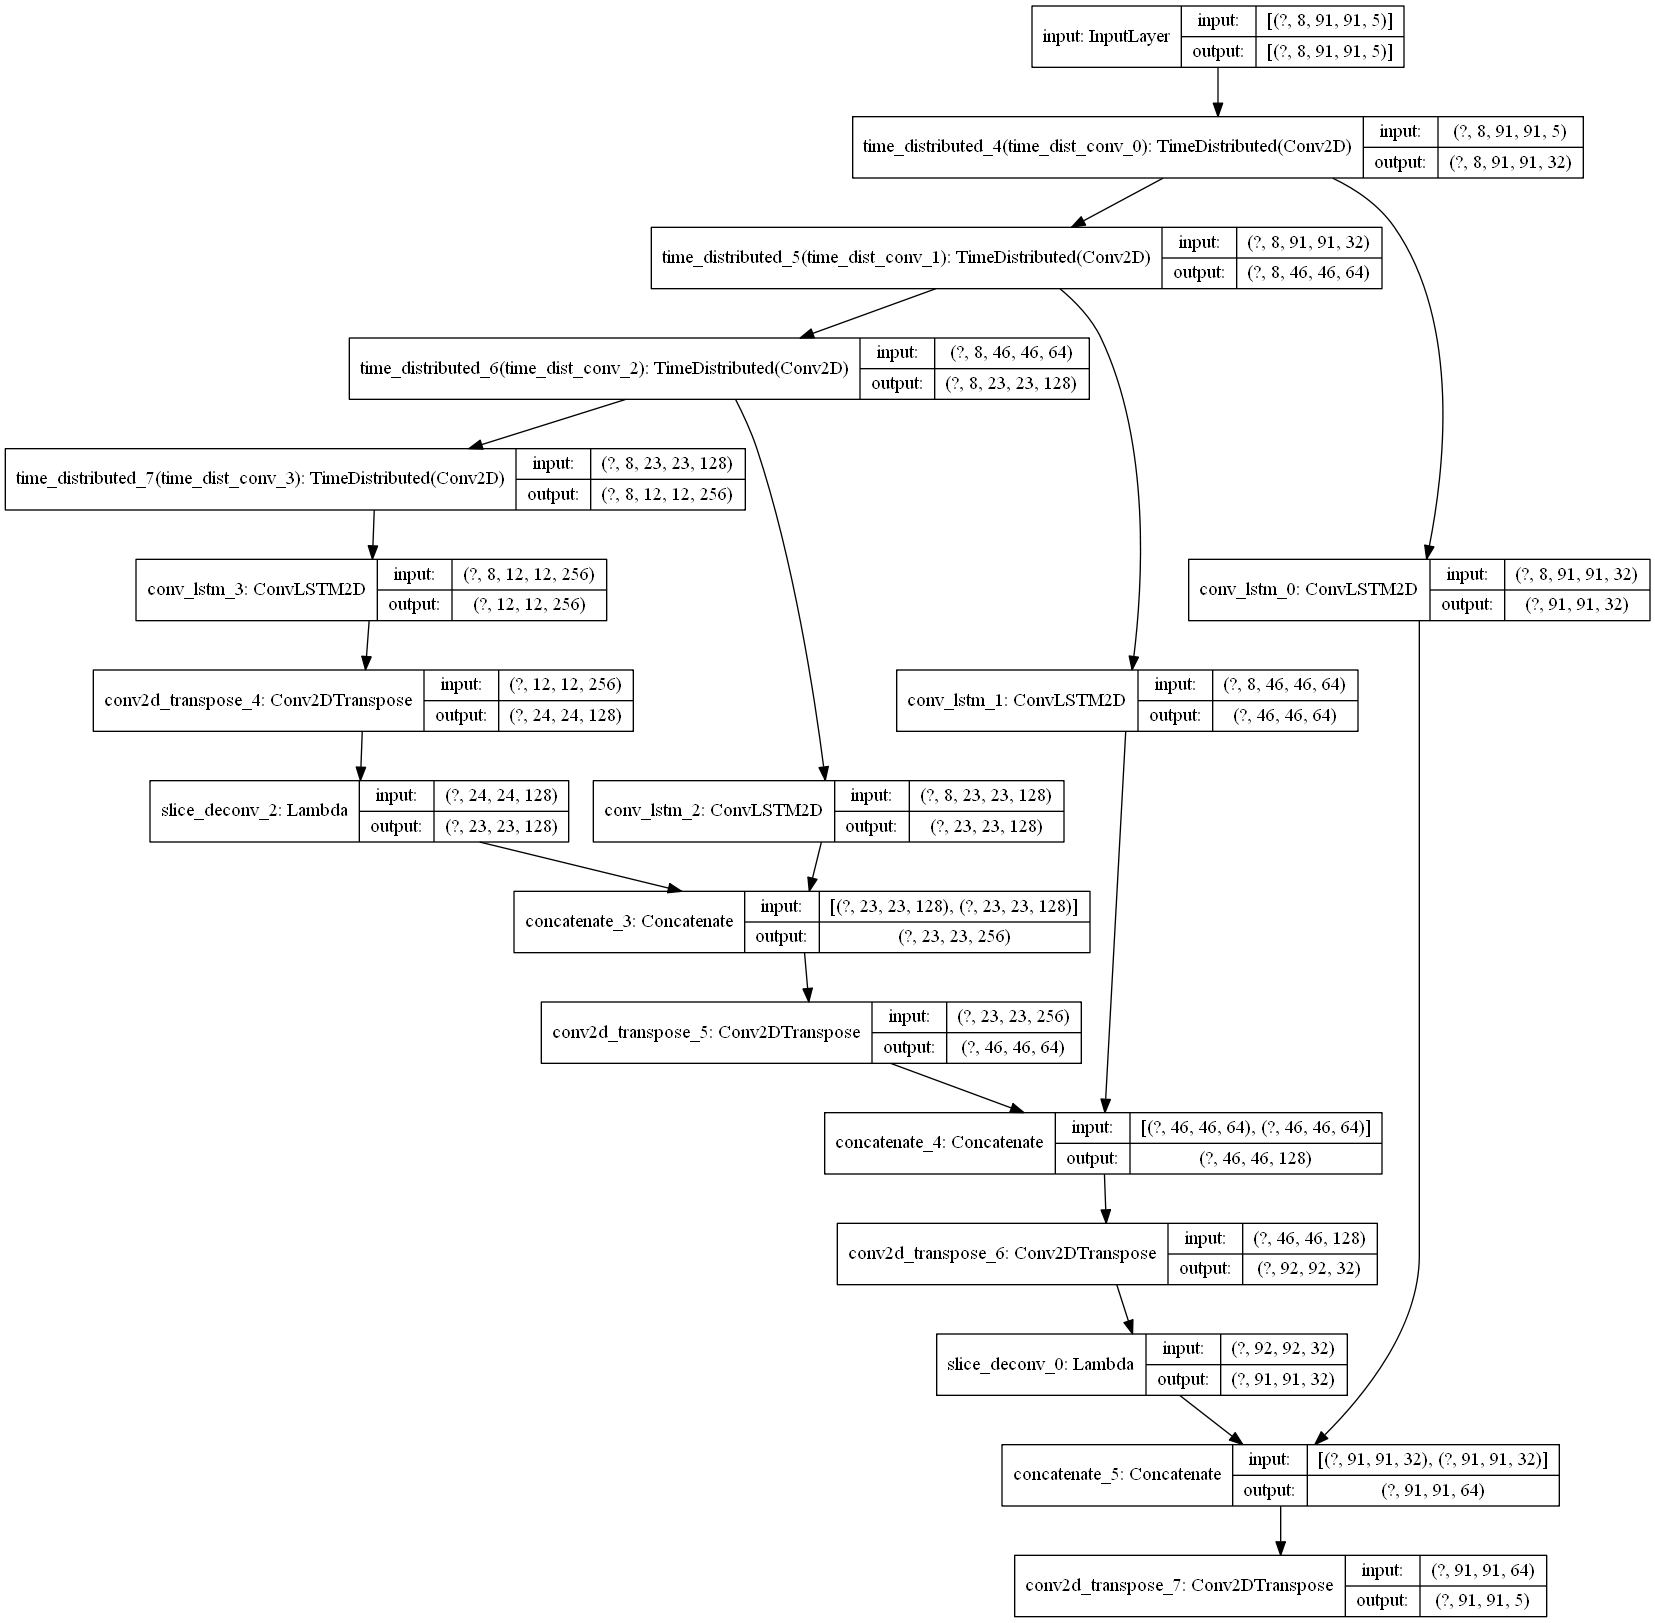

In [16]:
model.compile( 
    optimizer = 'adam', 
    loss = "mse"
)

model.summary()

keras.utils.plot_model( model, show_shapes = True )


In [17]:
try:
    model.fit( 
        train_in, 
        train_out, 
        epochs = 64, 
        batch_size = 8, 
        validation_data = [eval_in, eval_out], 
        verbose = 1
    )
    winsound.Beep( 880, 2000 )
except KeyboardInterrupt:
    print( "\nBreak!")
except ResourceExhaustedError:
    print( "\nOOM! -.-")
    

Epoch 1/64
240/240 [==============================] - 104s 433ms/step - loss: 0.1806 - val_loss: 0.1169
Epoch 2/64
 28/240 [==>...........................] - ETA: 1:20 - loss: 0.1168
Break!
